## Pandas for the NBA Lover
## The Three Point Revolution and the Anatomy of the DataFrame

Welcome!

For our first tuturial, we will be examining some NBA data from the past 20 seasons. This will be our introduction to the **DataFrame**, the core data structure of the pandas library. We will learn about the DataFrame's key concepts, as well as some terms, definitions, and rules that relate to how DataFrame's are used. At the end, we will produce a chart illustrating how the NBA has evolved over the past 20 years.

---

### 2.1 What is a DataFrame?

First things first, let's import the pandas library.

In [1]:
import pandas as pd

A DataFrame is a data structure that makes it easy to work with tabular data.

Let's create our first DataFrame by reading a `.csv` file containing league-wide, per-game averages for each of the past 20 regular seasons. The first few rows of this file look like this:

In [2]:
!cat ../data/season_avg.csv | head -n 6

Season,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,Pace
2019,40.7,88.7,11.0,31.2,17.7,23.2,10.4,34.5,44.8,23.9,7.8,5.1,14.2,21.6,110.2,0.459,0.352,99.7
2018,39.6,86.1,10.5,29.0,16.6,21.7,9.7,33.8,43.5,23.2,7.7,4.8,14.3,19.9,106.3,0.46,0.362,97.3
2017,39.0,85.4,9.7,27.0,17.8,23.1,10.1,33.4,43.5,22.6,7.7,4.7,14.0,19.9,105.6,0.457,0.358,96.4
2016,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,7.8,5.0,14.4,20.3,102.7,0.452,0.354,95.8
2015,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,7.7,4.8,14.4,20.2,100.0,0.449,0.35,93.9


There are a variety of ways to loading data into a DataFrame, some of which we will see in later sections. We will use pandas' `read_csv()` method here:

In [3]:
df = pd.read_csv("../data/season_avg.csv")
type(df)

pandas.core.frame.DataFrame

#### 2.1.1 Quick Peek into DataFrame Functionality

Before diving into technical details of what a DataFrame is, let's  first take a quick peek at some the things we can do with our DataFrame. <br><br> The `.head()` method prints the DataFrame's first 5 rows:

In [4]:
df.head()

,Season,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,Pace
0,2019,40.7,88.7,11.0,31.2,17.7,23.2,10.4,34.5,44.8,23.9,7.8,5.1,14.2,21.6,110.2,0.459,0.352,99.7
1,2018,39.6,86.1,10.5,29.0,16.6,21.7,9.7,33.8,43.5,23.2,7.7,4.8,14.3,19.9,106.3,0.460,0.362,97.3
2,2017,39.0,85.4,9.7,27.0,17.8,23.1,10.1,33.4,43.5,22.6,7.7,4.7,14.0,19.9,105.6,0.457,0.358,96.4
3,2016,38.2,84.6,8.5,24.1,17.7,23.4,10.4,33.3,43.8,22.3,7.8,5.0,14.4,20.3,102.7,0.452,0.354,95.8
4,2015,37.5,83.6,7.8,22.4,17.1,22.8,10.9,32.4,43.3,22.0,7.7,4.8,14.4,20.2,100.0,0.449,0.350,93.9


The `.shape` property tells us our DataFrame has 20 rows and 19 columns, respectively:

In [5]:
df.shape

(20, 19)

The `.describe()` method gives us a quick summary of our data:

In [6]:
df.describe().round(decimals=1)

,Season,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,FG%,3P%,Pace
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
mean,2009.5,37.2,82.2,6.9,19.3,18.2,24.1,11.2,31.2,42.4,21.8,7.6,4.9,14.5,21.2,99.5,0.5,0.4,92.9
std,5.9,1.4,2.4,1.8,5.1,1.0,1.3,0.7,1.5,1.0,0.8,0.3,0.2,0.4,1.1,4.2,0.0,0.0,2.6
min,2000.0,35.0,79.0,4.8,13.7,16.6,21.7,9.7,29.8,41.0,20.6,7.2,4.6,14.0,19.6,93.4,0.4,0.3,90.1
25%,2004.8,36.1,80.8,5.5,15.6,17.7,23.2,10.9,30.3,41.8,21.3,7.3,4.8,14.3,20.3,96.8,0.4,0.4,91.2
50%,2009.5,37.1,81.4,6.4,18.1,18.4,24.3,11.1,30.6,42.2,21.8,7.7,4.9,14.4,21.0,99.2,0.5,0.4,92.0
75%,2014.2,37.7,83.2,7.7,21.7,18.8,24.9,12.0,32.0,43.0,22.2,7.8,5.1,14.7,21.9,100.6,0.5,0.4,93.9
max,2019.0,40.7,88.7,11.0,31.2,19.7,26.3,12.4,34.5,44.8,23.9,7.9,5.3,15.5,23.3,110.2,0.5,0.4,99.7


The cells above demonstrate that we can loosely describe a DataFrame as a structure equipped with numerous methods for working with tabular data. Let's now turn to two underlying structures that power a DataFrame, the **Series** and the **Index**. Becoming familiar with these two structures will both paint a clearer picture of what a DataFrame is, and help us build the necessary groundwork to work with pandas effectively.

---

### 2.2 DataFrame Concepts

A DataFrame can also be described as a "labeled container" for tabular data. A Python dictionary is a more common example of a "labeled container" - we use a key to query a dictionary for an associated value. Similarily, we can use column names to query our DataFrame for a statistic, such as Pace of Game:

In [7]:
df['Pace']  # df.Pace works as well

0     99.7
1     97.3
2     96.4
3     95.8
4     93.9
5     93.9
6     92.0
7     91.3
8     92.1
9     92.7
10    91.7
11    92.4
12    91.9
13    90.5
14    90.9
15    90.1
16    91.0
17    90.7
18    91.3
19    93.1
Name: Pace, dtype: float64

We can see from the outpt that the fastest season of the last 20 years was almost 10 possessions per game faster than the slowest season. However, there's one slight problem: it isn't immeadiately clear which season each data point corresponds to. Instead, we only see a column with numbers from 0 to 19 to the left. This same column also appears when we query for another statistic:

In [8]:
df['3PA']

0     31.2
1     29.0
2     27.0
3     24.1
4     22.4
5     21.5
6     20.0
7     18.4
8     18.0
9     18.1
10    18.1
11    18.1
12    16.9
13    16.0
14    15.8
15    14.9
16    14.7
17    14.7
18    13.7
19    13.7
Name: 3PA, dtype: float64

Fortunately, this is easy to fix.

### 2.2.1 The Index

These numbers exist because every row in a DataFrame has a "name", which are formally referred to as **labels**. Collectively, these labels are known as an **Index**, and can be accessed through the DataFrame's `.index` property. We didn't specify how we wanted to label our rows when we created our DataFrame, so the index we see is the one pandas created one for us, ranging from 0 to the number of rows in our data.

In [9]:
df.index

RangeIndex(start=0, stop=20, step=1)

Although they can be anything we want them to be, the labels of an Index often come from a column in the original dataset. Let's now go ahead and re-create our DataFrame with the `index_col` parameter set to the "Season" column:

In [10]:
df_with_index = pd.read_csv("../data/season_avg.csv", index_col=0)
df_with_index.index

Int64Index([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
            2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000],
           dtype='int64', name='Season')

Now, when we query the DataFrame for a particular statistic, we see the corresponding season as well:

In [11]:
df_with_index['3PA']

Season
2019    31.2
2018    29.0
2017    27.0
2016    24.1
2015    22.4
2014    21.5
2013    20.0
2012    18.4
2011    18.0
2010    18.1
2009    18.1
2008    18.1
2007    16.9
2006    16.0
2005    15.8
2004    14.9
2003    14.7
2002    14.7
2001    13.7
2000    13.7
Name: 3PA, dtype: float64

This is what is meant by "labeled container" for tabular data. Thanks to spreadsheets and database tables, we're already familiar with the idea of labeled columns of data. But in a DataFrame, each row also has a label, which is stored in the Index. This has some important consequences, one of which we'll see soon below.

And I don't know about you, but some of those numbers really stand out. In particular, the number of three point attempts has increased 13.7 per game in 1999-00 to a staggering 31.2! 

Let's see what this looks like visually.

### 2.2.2 Why is the Index Important?

As I mentioned in the introduction to this tutorial series, pandas is popular because it simplifies data analysis. Case in point: it only takes a few lines of code to produce a chart that encapsulates how the NBA has changed over the years: 

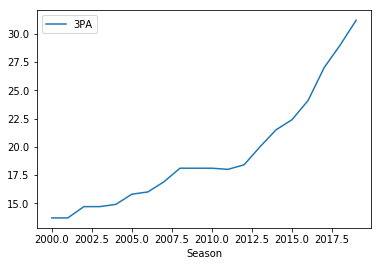

In [36]:
import matplotlib.pyplot as plt

df_with_index['3PA'].plot(legend=True)
plt.show()

But taking advantage of this simplicity requires pre-requisite knowledge. The above plot was so easy to create because under the hood, pandas used our DataFrame's index labels as the x-axis values. Pandas is full of subtle details like this, which can equally annoying and confusing at times. But if you've made it this far, you're well on your way to understanding them.

And now with that out of the way, I can get back to talking about what brought us all here in the first place: the NBA. I'm incredibly interested to see how long this steady increase in three point shooting will continue. Even more interesting to think about: if and when it does end, what will be the cause?